# Exploratory Data Analysis

> This notebook describes how to download and visualize data from the Icentia11k dataset

In [1]:
# !pip install wfdb

import logging
logging.basicConfig(level=logging.INFO)
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent)) # Adds the parent directory of nbs/ to the path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wfdb

from src.ecg_classification.data_loader import Icentia11k

## Visualizing ECG Recordings + Arrythmias

In [2]:
# Tan et al. (Icentia11k) use a frame length of 2049.
# However, we choose to use a smaller frame length to accomodate our DeepBeat-inspired model, which accepts a frame length of 800
dataset = Icentia11k(Path("../data/icentia11k"), frame_length=800)

### Abnormal Beat Example (Patient 900, segment 0)

This patient exhibits Premature Vascular Contraction (PVC) in the 0th segment of their ECG recordings

INFO:root:p00900_s00.atr already fetched
INFO:root:p00900_s00.hea already fetched
INFO:root:p00900_s00.dat already fetched


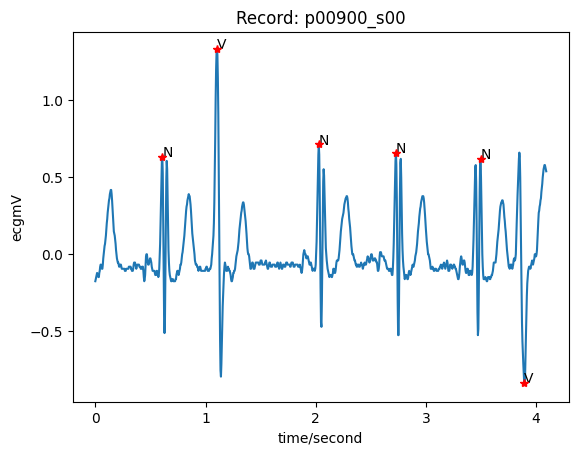

In [3]:
# Adjust parameters to download additional data
dataset.download(patient_id=900, segments=[0])

# Get recordings and annotations
rec, ann = dataset.get_recording(patient_id=900, segment=00, start=2000, length=1024)

wfdb.plot_wfdb(rec, ann, plot_sym=True)

In [4]:
frames, beat_classes, rhythm_classes = dataset.get_frames_and_labels(patient_id=900, segment=0)
print(f"frames: {frames.shape}, number of beat classes: {len(beat_classes)}, number of rhythm classes: {len(rhythm_classes)}")

frames: (1310, 800), number of beat classes: 1310, number of rhythm classes: 1310


In [5]:
print("The beat type maps to a column index", dataset.beat_mapping)
print("Count of frames containing N, S, and V beats:", np.sum(beat_classes, axis=0))
print("The matrix below indicates the presence or absence of N, S, and V beats in each frame (row):")
beat_classes

The beat type maps to a column index {'N': 0, 'S': 1, 'V': 2}
Count of frames containing N, S, and V beats: [1291    5  247]
The matrix below indicates the presence or absence of N, S, and V beats in each frame (row):


array([[1, 0, 1],
       [1, 0, 0],
       [1, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], shape=(1310, 3))

In [6]:
# Sanity check: the count of classes above should be less than or equal the counts from the WFDB file
rec, ann = dataset.get_recording(patient_id=900, segment=00, start=0, length=frames.shape[0]*frames.shape[1])
# Beat annotations are stored in the symbol property
pd.Series(ann.symbol).value_counts()

N    5477
V     258
Q     171
+      37
S       5
Name: count, dtype: int64

In [7]:
print("The beat type maps to a column", dataset.rhythm_mapping)
print("Count of frames containing N, AFIB, and AFL rhythms:", np.sum(rhythm_classes, axis=0))
print("The matrix below indicates the presence or absence of N, AFIB, and AFL beats in each frame (row):")
rhythm_classes

The beat type maps to a column {'(N': 0, '(AFIB': 1, '(AFL': 2}
Count of frames containing N, AFIB, and AFL rhythms: [1310    0]
The matrix below indicates the presence or absence of N, AFIB, and AFL beats in each frame (row):


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], shape=(1310, 2))

In [ ]:
# Sanity check: the count of classes above should be less than or equal to the counts from the WFDB file
# Rhythm annotations are stored in the aux_note property
pd.Series(ann.aux_note).value_counts()

### Abnormal Rhythm Example (Patient 1100, segment 0)

This patient exhibits Atrial Fibrillation in the 0th segmement of their ECG recording

INFO:root:p01100_s00.atr already fetched
INFO:root:p01100_s00.hea already fetched
INFO:root:p01100_s00.dat already fetched


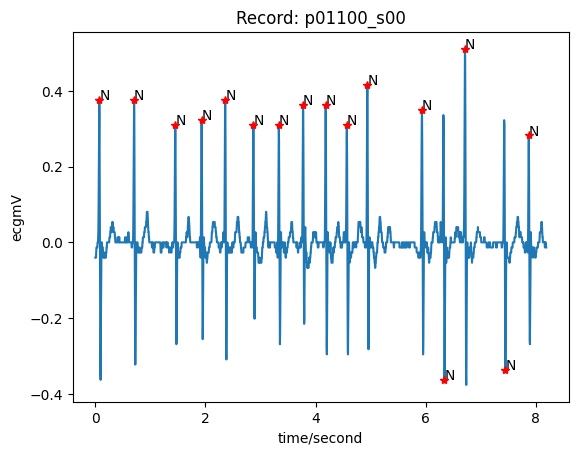

In [8]:
# Adjust parameters to download additional data
dataset.download(patient_id=1100, segments=[0])

# Get recordings and annotations
rec, ann = dataset.get_recording(patient_id=1100, segment=0, start=10_000, length=2048)

wfdb.plot_wfdb(rec, ann, plot_sym=True)

In [9]:
frames, beat_classes, rhythm_classes = dataset.get_frames_and_labels(patient_id=1100, segment=0)
print(f"frames: {frames.shape}, number of beat classes: {len(beat_classes)}, number of rhythm classes: {len(rhythm_classes)}")

frames: (1310, 800), number of beat classes: 1310, number of rhythm classes: 1310


In [10]:
print("The beat type maps to a column index", dataset.beat_mapping)
print("Count of frames containing N, S, and V beats:", np.sum(beat_classes, axis=0))
print("The matrix below indicates the presence or absence of N, S, and V beats in each frame (row):")
beat_classes

The beat type maps to a column index {'N': 0, 'S': 1, 'V': 2}
Count of frames containing N, S, and V beats: [888   0   1]
The matrix below indicates the presence or absence of N, S, and V beats in each frame (row):


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], shape=(1310, 3))

In [11]:
# Sanity check: the count of classes above should be less than or equal the counts from the WFDB file
rec, ann = dataset.get_recording(patient_id=1100, segment=00, start=0, length=frames.shape[0]*frames.shape[1])
# Beat annotations are stored in the symbol property
pd.Series(ann.symbol).value_counts()

N    5178
Q    3147
+     220
V       1
Name: count, dtype: int64

In [12]:
print("The beat type maps to a column", dataset.rhythm_mapping)
print("Count of frames containing N, AFIB, and AFL rhythms:", np.sum(rhythm_classes, axis=0))
print("The matrix below indicates the presence or absence of N, AFIB, and AFL beats in each frame (row):")
rhythm_classes

The beat type maps to a column {'(N': 0, '(AFIB': 1, '(AFL': 2}
Count of frames containing N, AFIB, and AFL rhythms: [1200  110]
The matrix below indicates the presence or absence of N, AFIB, and AFL beats in each frame (row):


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], shape=(1310, 2))

In [ ]:
# Sanity check: the count of classes above should be less than or equal to the counts from the WFDB file
# Rhythm annotations are stored in the aux_note property
pd.Series(ann.aux_note).value_counts()

In [21]:
# datapoint = {
#     "signal": frames,
#     "rhythm": rhythm_classes,
#     "qa_label": ,
# }

filepath = Path("../data/icentia11k_npz/p1100.npz")
np.savez(filepath, signal=frames, rhythm=rhythm_classes, qa_label=np.zeros((len(frames), 3)))

In [22]:
data_p1100 = np.load(filepath)

In [23]:
data_p1100["signal"]

array([[ 2.07087161,  2.04397717,  2.01708274, ...,  1.06233024,
         1.14301355,  1.15646077],
       [ 1.04888302,  0.84717475,  0.5916776 , ...,  0.01344722,
         0.01344722,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.2958388 ,
         0.21515549,  0.10757775],
       ...,
       [-0.10757775, -0.09413053, -0.06723609, ..., -0.01344722,
        -0.17481384, -0.25549715],
       [-0.25549715, -0.16136662, -0.05378887, ...,  0.01344722,
         0.        ,  0.        ],
       [ 0.01344722,  0.04034165,  0.05378887, ...,  0.02689444,
         0.02689444,  0.01344722]], shape=(1310, 800))

In [24]:
data_p1100

NpzFile '../data/icentia11k_npz/p1100.npz' with keys: signal, rhythm, qa_label